# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [ ]:
## DATA DICTIONARY

In [8]:
import pandas as pd
import json

data = pd.read_csv("/Users/nerenevaz/Desktop/SYDDAT7/SYD_DAT_7/data/stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
data.tail()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
7390,http://techcrunch.com/2010/09/08/kno-raises-46...,8958,"{""title"":""Kno Raises 46 Million More To Build ...",computer_internet,0.651067,3.010526,0.474747,0.222222,0.191919,0.191919,...,38,0,2219,99,11,0.040404,0.071429,0,Kno Raises 46 Million More To Build Most Power...,Marc Andreessen is normally enthusiastic about...
7391,http://www.uncoached.com/category/why-i-miss-c...,8895,"{""title"":""Why I Miss College "",""body"":""Mar 30 ...",culture_politics,0.14192,2.208054,0.483333,0.246667,0.036667,0.026667,...,34,0,5672,300,4,0.020000,0.109453,0,Why I Miss College,Mar 30 2009 I d like to congratulate Jane on h...
7392,http://eatthis.menshealth.com/slide/sweet-pota...,1191,"{""title"":""Sweet Potatoes Eat This Not That i'...",recreation,0.196273,2.000000,0.315789,0.171053,0.105263,0.052632,...,43,0,848,76,5,0.434211,0.117647,1,Sweet Potatoes Eat This Not That i'm eating t...,They re loaded with vitamin C which smoothes o...
7393,http://naturallyella.com/,5612,"{""title"":""Naturally Ella "",""body"":"" "",""url"":""n...",arts_entertainment,0.617876,1.026316,0.210526,0.052632,0.000000,0.000000,...,37,1,386,38,0,0.026316,0.333333,1,Naturally Ella,
7394,http://sportsillustrated.cnn.com/2011_swimsuit...,90,"{""title"":""Esti Ginzburg Swimsuit by Letarte by...",?,?,1.158209,0.505917,0.428994,0.023669,0.000000,...,78,?,515,338,4,0.005917,0.134146,0,Esti Ginzburg Swimsuit by Letarte by Lisa Cabr...,Esti Ginzburg 20 is a native of Tel Aviv Israe...


## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

# FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [ ]:
### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [2]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [ ]:
# ... #


> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

In [ ]:
# ... #

> ### Exercise: 5. How many articles are there per category?

In [ ]:
# ... #

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [ ]:
# ... #

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
print build_tree_image(model)

None


In [9]:
import sklearn.tree
import pandas

In [20]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=5)


In [143]:
X = data[['image_ratio', 'html_ratio','commonlinkratio_3', 'label','commonlinkratio_4','linkwordscore']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

In [144]:
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

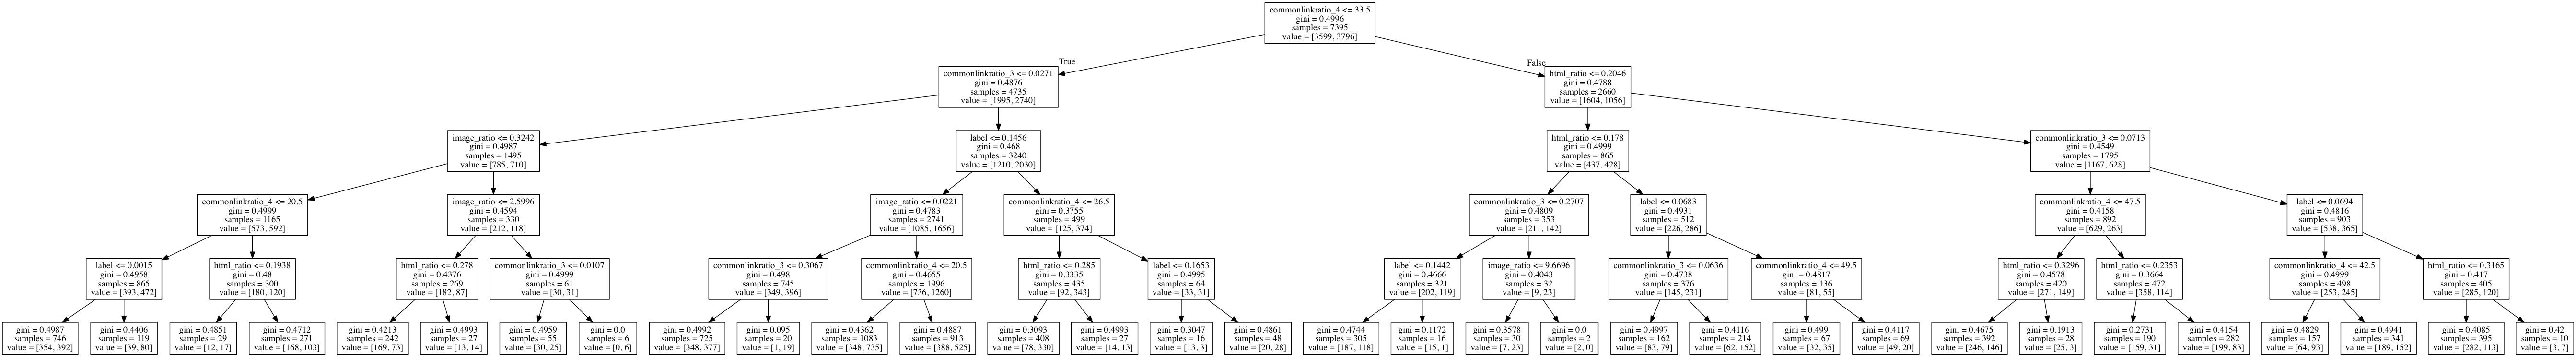

In [145]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['image_ratio', 'html_ratio','commonlinkratio_3', 'label','commonlinkratio_4','linkwordscore'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [146]:
import sklearn.ensemble

In [147]:
brute_force = sklearn.grid_search.GridSearchCV(
sklearn.ensemble.RandomForestRegressor(),
    param_grid = {
    'n_estimators' :[1,5,10,20,30,40],
   'max_depth':[2,5,10,20],
    'max_features':[2,3,4]
        }
)

In [148]:
brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 20, 30, 40], 'max_features': [2, 3, 4], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [149]:
brute_force.best_params_

{'max_depth': 10, 'max_features': 2, 'n_estimators': 30}

In [150]:
brute_force.best_score_

0.087514975384204982

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [ ]:
from sklearn.cross_validation import cross_val_score

# ... #

###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [ ]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

### Demo: Extracting importance of features

In [ ]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [ ]:
# ... #

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [ ]:
# ... #